<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_groupwise_(y_hat)_0_3_0_7_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.3_0.7'

In [4]:
os.listdir(base_path)

['data_groupwise_0.3_0.7_n20.csv',
 'data_groupwise_0.3_0.7_n30.csv',
 'data_groupwise_0.3_0.7_n60.csv',
 'data_groupwise_0.3_0.7_n120.csv',
 'data_groupwise_0.3_0.7_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,93.570064,39.438923,70.544947,35.642617,-0.498005,248.698547,248.764435,-0.065887
1,0.0,1.0,73.158728,38.889734,88.679729,94.765071,-0.386701,305.106562,305.363858,-0.257296
2,0.0,2.0,86.116456,65.559587,59.935644,37.283418,-0.055582,258.839523,258.649092,0.190431
3,0.0,3.0,86.166941,60.136859,94.509132,78.213053,0.083754,329.109739,328.841290,0.268449
4,0.0,4.0,45.015889,55.932235,56.181925,89.724362,-0.183132,256.671279,257.003089,-0.331810
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,62.608126,67.950581,51.270144,66.084262,-0.893261,257.019853,257.970931,-0.951078
59996,999.0,56.0,79.296538,47.199324,57.043559,79.247104,0.020557,272.807082,272.696977,0.110105
59997,999.0,57.0,81.469923,97.518217,67.651653,43.235331,-0.246880,299.628243,299.675710,-0.047467
59998,999.0,58.0,88.670861,62.417903,78.787581,76.055630,1.696196,317.628171,315.737600,1.890571


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,93.570064,39.438923,70.544947,35.642617,-0.498005,248.698547,248.764435,-0.065887
1,0.0,1.0,73.158728,38.889734,88.679729,94.765071,-0.386701,305.106562,305.363858,-0.257296
2,0.0,2.0,86.116456,65.559587,59.935644,37.283418,-0.055582,258.839523,258.649092,0.190431
3,0.0,3.0,86.166941,60.136859,94.509132,78.213053,0.083754,329.109739,328.841290,0.268449
4,0.0,4.0,45.015889,55.932235,56.181925,89.724362,-0.183132,256.671279,257.003089,-0.331810
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,62.608126,67.950581,51.270144,66.084262,-0.893261,257.019853,257.970931,-0.951078
59996,999.0,56.0,79.296538,47.199324,57.043559,79.247104,0.020557,272.807082,272.696977,0.110105
59997,999.0,57.0,81.469923,97.518217,67.651653,43.235331,-0.246880,299.628243,299.675710,-0.047467
59998,999.0,58.0,88.670861,62.417903,78.787581,76.055630,1.696196,317.628171,315.737600,1.890571


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    93.570064  39.438923  70.544947  35.642617 -0.498005  248.698547   
      1.0    73.158728  38.889734  88.679729  94.765071 -0.386701  305.106562   
      2.0    86.116456  65.559587  59.935644  37.283418 -0.055582  258.839523   
      3.0    86.166941  60.136859  94.509132  78.213053  0.083754  329.109739   
      4.0    45.015889  55.932235  56.181925  89.724362 -0.183132  256.671279   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   62.608126  67.950581  51.270144  66.084262 -0.893261  257.019853   
      56.0   79.296538  47.199324  57.043559  79.247104  0.020557  272.807082   
      57.0   81.469923  97.518217  67.651653  43.235331 -0.246880  299.628243   
      58.0   88.670861  62.417903  78.787581  76.055630  1.696196  317.628171   
      59.0   23.300485  99.828189  83.664342  90.488160 -0.383944  306.897230   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    248.764435 -0.065887  
      1.0    305.363858 -0.257296  
      2.0    258.649092  0.190431  
      3.0    328.841290  0.268449  
      4.0    257.003089 -0.331810  
...                 ...       ...  
999.0 55.0   257.970931 -0.951078  
      56.0   272.696977  0.110105  
      57.0   299.675710 -0.047467  
      58.0   315.737600  1.890571  
      59.0   307.846623 -0.949392  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    93.570064  39.438923  70.544947  35.642617 -0.498005  248.698547   
      1.0    73.158728  38.889734  88.679729  94.765071 -0.386701  305.106562   
      2.0    86.116456  65.559587  59.935644  37.283418 -0.055582  258.839523   
      3.0    86.166941  60.136859  94.509132  78.213053  0.083754  329.109739   
      4.0    45.015889  55.932235  56.181925  89.724362 -0.183132  256.671279   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   62.608126  67.950581  51.270144  66.084262 -0.893261  257.019853   
      56.0   79.296538  47.199324  57.043559  79.247104  0.020557  272.807082   
      57.0   81.469923  97.518217  67.651653  43.235331 -0.246880  299.628243   
      58.0   88.670861  62.417903  78.787581  76.055630  1.696196  317.628171   
      59.0   23.300485  99.828189  83.664342  90.488160 -0.383944  306.897230   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    248.764435 -0.065887  
      1.0    305.363858 -0.257296  
      2.0    258.649092  0.190431  
      3.0    328.841290  0.268449  
      4.0    257.003089 -0.331810  
...                 ...       ...  
999.0 55.0   257.970931 -0.951078  
      56.0   272.696977  0.110105  
      57.0   299.675710 -0.047467  
      58.0   315.737600  1.890571  
      59.0   307.846623 -0.949392  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,93.570064,39.438923,70.544947,35.642617,-0.498005,248.698547,248.764435,-0.065887
1,0.0,1.0,73.158728,38.889734,88.679729,94.765071,-0.386701,305.106562,305.363858,-0.257296
2,0.0,2.0,86.116456,65.559587,59.935644,37.283418,-0.055582,258.839523,258.649092,0.190431
3,0.0,3.0,86.166941,60.136859,94.509132,78.213053,0.083754,329.109739,328.841290,0.268449
4,0.0,4.0,45.015889,55.932235,56.181925,89.724362,-0.183132,256.671279,257.003089,-0.331810
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,62.608126,67.950581,51.270144,66.084262,-0.893261,257.019853,257.970931,-0.951078
59996,999.0,56.0,79.296538,47.199324,57.043559,79.247104,0.020557,272.807082,272.696977,0.110105
59997,999.0,57.0,81.469923,97.518217,67.651653,43.235331,-0.246880,299.628243,299.675710,-0.047467
59998,999.0,58.0,88.670861,62.417903,78.787581,76.055630,1.696196,317.628171,315.737600,1.890571


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    93.570064  39.438923  70.544947  35.642617 -0.498005  248.698547   
      1.0    73.158728  38.889734  88.679729  94.765071 -0.386701  305.106562   
      2.0    86.116456  65.559587  59.935644  37.283418 -0.055582  258.839523   
      3.0    86.166941  60.136859  94.509132  78.213053  0.083754  329.109739   
      4.0    45.015889  55.932235  56.181925  89.724362 -0.183132  256.671279   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   62.608126  67.950581  51.270144  66.084262 -0.893261  257.019853   
      56.0   79.296538  47.199324  57.043559  79.247104  0.020557  272.807082   
      57.0   81.469923  97.518217  67.651653  43.235331 -0.246880  299.628243   
      58.0   88.670861  62.417903  78.787581  76.055630  1.696196  317.628171   
      59.0   23.300485  99.828189  83.664342  90.488160 -0.383944  306.897230   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    248.764435 -0.065887  
      1.0    305.363858 -0.257296  
      2.0    258.649092  0.190431  
      3.0    328.841290  0.268449  
      4.0    257.003089 -0.331810  
...                 ...       ...  
999.0 55.0   257.970931 -0.951078  
      56.0   272.696977  0.110105  
      57.0   299.675710 -0.047467  
      58.0   315.737600  1.890571  
      59.0   307.846623 -0.949392  

[60000 rows x 8 columns]

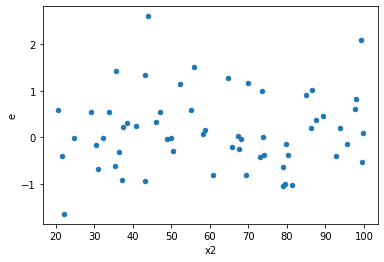

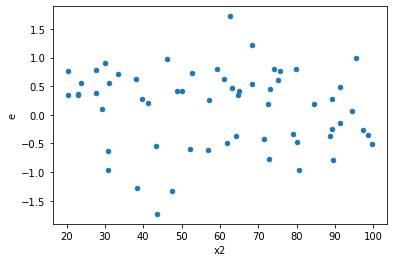

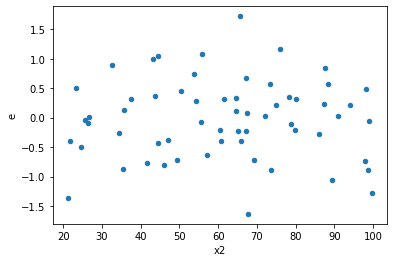

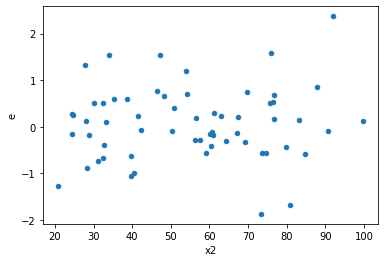

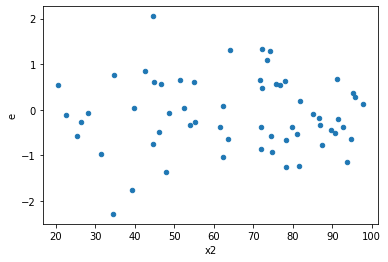

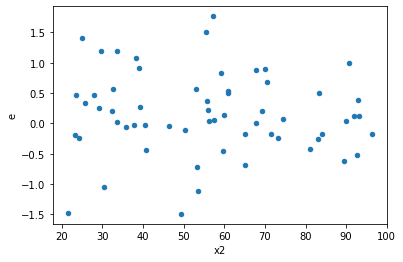

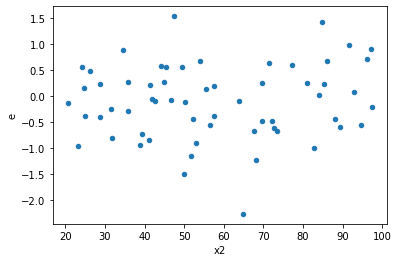

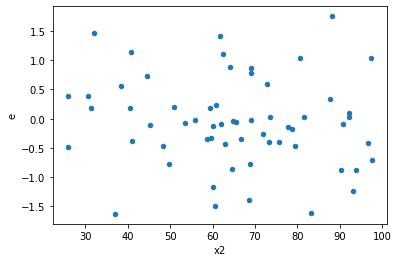

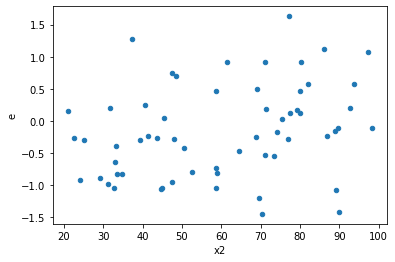

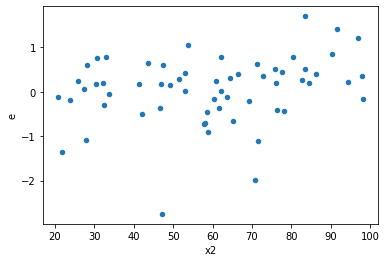

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,20.0,20.0,10.042061425327406,12.739957571629478,0.5021030712663703,0.6369978785814739,1.2686595940846987,0.5996668682592907,0.7001665658703546,0.29983343412964536,Reject005=1 : Homoscedasticity
3.0,20.0,20.0,10.174970715936627,10.765522254211819,0.5087485357968313,0.538276112710591,1.058039630261563,0.9008565402796762,0.5495717298601619,0.4504282701398381,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,6.848169471130095,14.995271019049829,0.3424084735565048,0.7497635509524915,2.189675807858664,0.087335609964871,0.9563321950175645,0.0436678049824355,Reject005=1 : Homoscedasticity
7.0,20.0,20.0,6.726537952105349,11.989078283338312,0.33632689760526746,0.5994539141669156,1.7823549601152302,0.20492296265062082,0.8975385186746896,0.10246148132531041,Reject005=1 : Homoscedasticity
9.0,20.0,20.0,9.800067733779532,10.828347823428617,0.4900033866889766,0.5414173911714308,1.1049258145537852,0.8256411362892377,0.5871794318553811,0.41282056814461887,Reject005=1 : Homoscedasticity
10.0,20.0,20.0,11.636334296729876,17.909960437060352,0.5818167148364938,0.8954980218530176,1.5391411058114355,0.34278854482499854,0.8286057275875007,0.17139427241249927,Reject005=1 : Homoscedasticity
11.0,20.0,20.0,5.425329197742642,8.6379303369375,0.2712664598871321,0.43189651684687497,1.5921486092551855,0.30652876593859113,0.8467356170307044,0.15326438296929557,Reject005=1 : Homoscedasticity
12.0,20.0,20.0,9.337446321001478,10.122820940856615,0.4668723160500739,0.5061410470428307,1.0841102152404023,0.8584735126581935,0.5707632436709033,0.42923675632909675,Reject005=1 : Homoscedasticity
13.0,20.0,20.0,13.104128424703491,14.554220365983594,0.6552064212351746,0.7277110182991797,1.1106591674228738,0.8167578156343236,0.5916210921828382,0.4083789078171618,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,11.505102274740736,8.568572492101836,0.5752551137370367,0.4284286246050918,0.7447628267428789,0.5159462127350616,Reject005=1 : Homoscedasticity
1.0,20.0,20.0,12.516162822428674,12.266587067422945,0.6258081411214337,0.6133293533711472,0.9800597228921875,0.9645227937997697,Reject005=1 : Homoscedasticity
2.0,20.0,20.0,10.042061425327406,12.739957571629478,0.5021030712663703,0.6369978785814739,1.2686595940846987,0.5996668682592907,Reject005=1 : Homoscedasticity
3.0,20.0,20.0,10.174970715936627,10.765522254211819,0.5087485357968313,0.538276112710591,1.058039630261563,0.9008565402796762,Reject005=1 : Homoscedasticity
4.0,20.0,20.0,7.564712243674335,7.307799149644817,0.37823561218371676,0.36538995748224085,0.9660379554761848,0.9391806349093301,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,6.848169471130095,14.995271019049829,0.3424084735565048,0.7497635509524915,2.189675807858664,0.087335609964871,Reject005=1 : Homoscedasticity
6.0,20.0,20.0,12.663684359298637,6.9690145365782925,0.6331842179649319,0.34845072682891465,0.5503149272242492,0.19038078152835258,Reject005=1 : Homoscedasticity
7.0,20.0,20.0,6.726537952105349,11.989078283338312,0.33632689760526746,0.5994539141669156,1.7823549601152302,0.20492296265062082,Reject005=1 : Homoscedasticity
8.0,20.0,20.0,7.722516755160107,6.0036159760069205,0.38612583775800535,0.30018079880034604,0.7774170217235677,0.5787028283164797,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      927
Reject005=0 : Heteroscedasticity     73
Name: Result_test, dtype: int64